# Restaurants in Toronto

## By David Rua

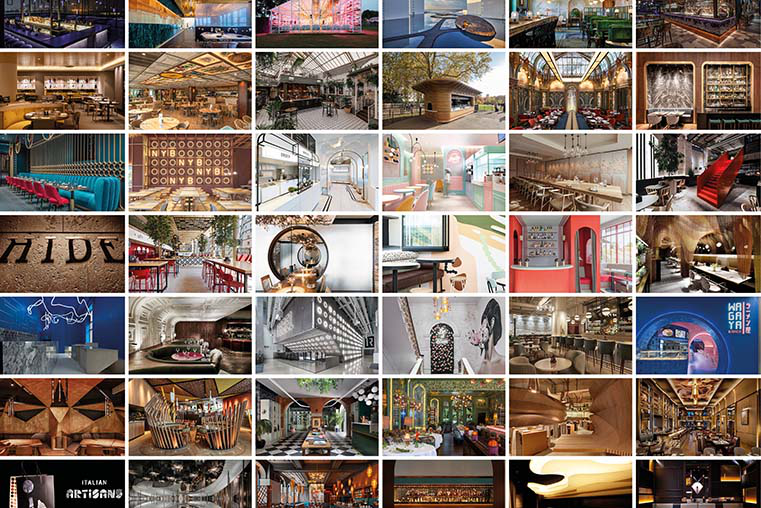

In [1]:
from PIL import Image
im= Image.open('Restaurant03.jpg')
im

### Install and import libraries.

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!pip install geopy
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

# for ggplot-like style
mpl.style.use('ggplot')

!conda install -c conda-forge wikipedia --yes 
import wikipedia as wp

print('Folium installed.')
print('Libraries imported.')

     |████████████████████████████████| 112kB 5.2MB/s eta 0:00:01
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         393 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0

The following package

### Data collection
Create Toronto dataframe from csv file.

In [3]:
# From Wikipedia, free encyclopedia
Toronto = pd.read_csv('Toronto-Neighborhoods.csv')

Show dataframe 10 first records.

In [4]:
Toronto.head(10)

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


Remove Boroughs with name "Not assigned".

In [5]:
Notassigned=Toronto[Toronto['Borough']=='Not assigned'].index
Toronto.drop(Notassigned, axis=0, inplace=True)
Toronto.head(10)

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


Shape of dataframe.

In [6]:
Toronto.shape

(103, 3)

Group dataframe by Borough.

In [7]:
Toronto = Toronto.groupby(['Borough', 'Postal Code'])['Neighborhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()
Toronto.head(10)

,Borough,Postal Code,Neighborhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,"North Toronto West, Lawrence Park"
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,"Moore Park, Summerhill East"
5,Central Toronto,M4V,"Summerhill West, Rathnelly, South Hill, Forest..."
6,Central Toronto,M5N,Roselawn
7,Central Toronto,M5P,"Forest Hill North & West, Forest Hill Road Park"
8,Central Toronto,M5R,"The Annex, North Midtown, Yorkville"
9,Downtown Toronto,M4W,Rosedale


Import geographical coordinates of Toronto.

In [8]:
import io
import requests

url = "https://cocl.us/Geospatial_data"
lat_long = requests.get(url).text
Coordinates=pd.read_csv(io.StringIO(lat_long))
Coordinates.head(10)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


Merge Toronto and Coordinates dataframes in a new dataframe.

In [10]:
Toronto_coord = pd.merge(Toronto, Coordinates, on ='Postal Code')
Toronto_coord.head(10)

,Borough,Postal Code,Neighborhood,Latitude,Longitude
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,Central Toronto,M4S,Davisville,43.704324,-79.388790
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160
5,Central Toronto,M4V,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049
6,Central Toronto,M5N,Roselawn,43.711695,-79.416936
7,Central Toronto,M5P,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307
8,Central Toronto,M5R,"The Annex, North Midtown, Yorkville",43.672710,-79.405678
9,Downtown Toronto,M4W,Rosedale,43.679563,-79.377529


In [11]:
Toronto_coord.shape

(103, 5)

Number of boroughs and neighborhoods of Toronto.

In [12]:
print('Toronto_coord dataframe has {} boroughs and {} neighborhoods.'.format(
        len(Toronto_coord['Borough'].unique()),
        Toronto_coord.shape[0]
    )
)

Toronto_coord dataframe has 10 boroughs and 103 neighborhoods.


Set geographical coordinates of Toronto.

In [13]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="Tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


Create a map of Toronto's neighborhoods.

In [14]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Toronto_coord['Latitude'], Toronto_coord['Longitude'], Toronto_coord['Borough'], Toronto_coord['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Foursquare
Get location data of Toronto using Foursquare.

In [15]:
# @hidden_cell
CLIENT_ID = 'RWNUIAK3BSSKVCLYB4SUIRF3JIG14JBUE45JZBRBRCOPVDML' # your Foursquare ID
CLIENT_SECRET = '21G2HKOXVJAXV5XYWDB1S40FHYKWEVM2QX2WBMLKAIGGVSZS' # your Foursquare Secret
VERSION = '20200622'
LIMIT = 30
print('Credentails ok')

Credentails ok


Explore Toronto's venues.

In [16]:
radius=2000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius)
results = requests.get(url).json()

In [17]:
#Function to get the category

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']

    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Using the get_category_type function, clean up the json and turn it into a pandas dataframe.

In [18]:
venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Nathan Phillips Square,Plaza,43.652270,-79.383516
2,Elgin And Winter Garden Theatres,Theater,43.653394,-79.378507
3,UNIQLO ユニクロ,Clothing Store,43.655910,-79.380641
4,Chatime 日出茶太,Bubble Tea Shop,43.655542,-79.384684
5,Silver Snail Comics,Comic Shop,43.657031,-79.381403
6,Richmond Station,American Restaurant,43.651569,-79.379266
7,Adelaide Club Toronto,Gym / Fitness Center,43.649279,-79.381921
8,CF Toronto Eaton Centre,Shopping Mall,43.654540,-79.380677
9,Hailed Coffee,Coffee Shop,43.658833,-79.383684


With this nearby_venues dataframe, explore the nearby venues.

In [19]:

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

80 venues per neighborhood.

In [20]:
LIMIT = 80
Toronto_venues = getNearbyVenues(names=Toronto_coord['Neighborhood'],
                                   latitudes=Toronto_coord['Latitude'],
                                   longitudes=Toronto_coord['Longitude']
                                  )

Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Queen's Park, Ontario Provincial Government
The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Business reply mail Processing Centre, South Central Letter 

Toronto's venues dataframe by category.

In [21]:
Toronto_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Park,43.728020,-79.388790,Lawrence Park Ravine,43.726963,-79.394382,Park
1,Lawrence Park,43.728020,-79.388790,J.N. Munkongolo & Associates - Family Lawyer,43.727437,-79.390264,Lawyer
2,Lawrence Park,43.728020,-79.388790,Zodiac Swim School,43.728532,-79.382860,Swim School
3,Lawrence Park,43.728020,-79.388790,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,Bus Line
4,Davisville North,43.712751,-79.390197,Sherwood Park,43.716551,-79.387776,Park
5,Davisville North,43.712751,-79.390197,Summerhill Market North,43.715499,-79.392881,Food & Drink Shop
6,Davisville North,43.712751,-79.390197,Homeway Restaurant & Brunch,43.712641,-79.391557,Breakfast Spot
7,Davisville North,43.712751,-79.390197,Winners,43.713236,-79.393873,Department Store
8,Davisville North,43.712751,-79.390197,Best Western Roehampton Hotel & Suites,43.708878,-79.390880,Hotel
9,Davisville North,43.712751,-79.390197,Subway,43.708474,-79.390674,Sandwich Place


Let's group these venues by neighborhood.

In [22]:
Toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood, Long Branch",8,8,8,8,8,8
"Bathurst Manor, Wilson Heights, Downsview North",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",23,23,23,23,23,23
...,...,...,...,...,...,...
"Willowdale, Willowdale West",6,6,6,6,6,6
Woburn,3,3,3,3,3,3
Woodbine Heights,6,6,6,6,6,6


In [23]:
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 266 uniques categories.


### Analyze Each Neighborhood
In these categories there are Restaurants. I will do one hot encoding for getting dummies of venue category. So that I can calculate count of all venue group by neighborhoods.

Next, I'll group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.

In [24]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,"Willowdale, Willowdale West",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,York Mills West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Print each neighborhood along with the top 5 most common venues.

In [25]:
num_top_venues = 5

for hood in Toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0                     Lounge   0.2
1             Clothing Store   0.2
2  Latin American Restaurant   0.2
3             Breakfast Spot   0.2
4               Skating Rink   0.2


----Alderwood, Long Branch----
          venue  freq
0   Pizza Place  0.25
1   Coffee Shop  0.12
2  Skating Rink  0.12
3           Pub  0.12
4          Pool  0.12


----Bathurst Manor, Wilson Heights, Downsview North----
              venue  freq
0       Coffee Shop  0.10
1              Bank  0.10
2  Sushi Restaurant  0.05
3    Ice Cream Shop  0.05
4       Bridal Shop  0.05


----Bayview Village----
                 venue  freq
0                 Café  0.25
1                 Bank  0.25
2  Japanese Restaurant  0.25
3   Chinese Restaurant  0.25
4          Yoga Studio  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0         Coffee Shop  0.09
1          Restaurant  0.09
2      Sandwich Place  0.09
3  Italian Restaurant  0.09
4        

Create the new dataframe and display the top 10 venues for each neighborhood.

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped['Neighborhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Skating Rink,Breakfast Spot,Lounge,Latin American Restaurant,Clothing Store,College Rec Center,College Stadium,Dumpling Restaurant,Drugstore,Donut Shop
1,"Alderwood, Long Branch",Pizza Place,Gym,Pool,Sandwich Place,Pub,Skating Rink,Coffee Shop,Distribution Center,Dog Run,Discount Store
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Restaurant,Ice Cream Shop,Supermarket,Sushi Restaurant,Bridal Shop,Deli / Bodega,Middle Eastern Restaurant,Pizza Place
3,Bayview Village,Japanese Restaurant,Café,Bank,Chinese Restaurant,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Women's Store
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Restaurant,Sandwich Place,Italian Restaurant,Indian Restaurant,Butcher,Hobby Shop,Café,Sushi Restaurant,Pizza Place


### Cluster Neighborhoods

Run k-means to cluster the neighborhood into 5 clusters.
Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [29]:
# set number of clusters
kclusters = 5

Toronto_grouped_clustering = Toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [30]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Toronto_merged = Toronto_coord

# merge Toronto_grouped with Toronto_coord to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Toronto_merged.head()

,Borough,Postal Code,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,0.0,Bus Line,Park,Swim School,Lawyer,College Gym,College Rec Center,Drugstore,Donut Shop,Doner Restaurant,Dog Run
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,0.0,Hotel,Park,Gym,Department Store,Sandwich Place,Pizza Place,Food & Drink Shop,Breakfast Spot,Convenience Store,Dessert Shop
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,0.0,Clothing Store,Coffee Shop,Yoga Studio,Sporting Goods Shop,Gift Shop,Ice Cream Shop,Fast Food Restaurant,Diner,Mexican Restaurant,Park
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,0.0,Pizza Place,Sandwich Place,Dessert Shop,Coffee Shop,Gym,Café,Italian Restaurant,Sushi Restaurant,Indian Restaurant,Seafood Restaurant
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,3.0,Playground,Restaurant,Park,Dim Sum Restaurant,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Women's Store


In [31]:
Toronto_merged['Cluster Labels'] = Toronto_merged['Cluster Labels'].fillna(0)
Toronto_merged['Cluster Labels']=Toronto_merged['Cluster Labels'].astype(int)
Toronto_merged.head()

,Borough,Postal Code,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,0,Bus Line,Park,Swim School,Lawyer,College Gym,College Rec Center,Drugstore,Donut Shop,Doner Restaurant,Dog Run
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,0,Hotel,Park,Gym,Department Store,Sandwich Place,Pizza Place,Food & Drink Shop,Breakfast Spot,Convenience Store,Dessert Shop
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,0,Clothing Store,Coffee Shop,Yoga Studio,Sporting Goods Shop,Gift Shop,Ice Cream Shop,Fast Food Restaurant,Diner,Mexican Restaurant,Park
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,0,Pizza Place,Sandwich Place,Dessert Shop,Coffee Shop,Gym,Café,Italian Restaurant,Sushi Restaurant,Indian Restaurant,Seafood Restaurant
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,3,Playground,Restaurant,Park,Dim Sum Restaurant,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Women's Store


Visualize the resulting clusters.

In [32]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Neighborhood'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

Cluster 1

In [33]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4N,0,Bus Line,Park,Swim School,Lawyer,College Gym,College Rec Center,Drugstore,Donut Shop,Doner Restaurant,Dog Run
1,M4P,0,Hotel,Park,Gym,Department Store,Sandwich Place,Pizza Place,Food & Drink Shop,Breakfast Spot,Convenience Store,Dessert Shop
2,M4R,0,Clothing Store,Coffee Shop,Yoga Studio,Sporting Goods Shop,Gift Shop,Ice Cream Shop,Fast Food Restaurant,Diner,Mexican Restaurant,Park
3,M4S,0,Pizza Place,Sandwich Place,Dessert Shop,Coffee Shop,Gym,Café,Italian Restaurant,Sushi Restaurant,Indian Restaurant,Seafood Restaurant
5,M4V,0,Pub,Coffee Shop,American Restaurant,Liquor Store,Supermarket,Sports Bar,Sushi Restaurant,Bank,Pizza Place,Fried Chicken Joint
...,...,...,...,...,...,...,...,...,...,...,...,...
96,M6R,0,Gift Shop,Breakfast Spot,Cuban Restaurant,Bookstore,Dog Run,Italian Restaurant,Bar,Bank,Restaurant,Dessert Shop
97,M6S,0,Café,Coffee Shop,Restaurant,Pub,Pizza Place,Sushi Restaurant,Diner,Italian Restaurant,Gourmet Shop,Gym
98,M6C,0,Trail,Playground,Hockey Arena,Field,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant
100,M6M,0,Sandwich Place,Bar,Convenience Store,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Women's Store,Dance Studio


Cluster 2

In [34]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
54,M2L,1,Cafeteria,Women's Store,Diner,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store,Cupcake Shop


Cluster 3

In [35]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
41,M8Y,2,Baseball Field,Women's Store,Curling Ice,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store
74,M9M,2,Baseball Field,Women's Store,Curling Ice,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store


Cluster 4

In [36]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 3, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,M4T,3,Playground,Restaurant,Park,Dim Sum Restaurant,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Women's Store
9,M4W,3,Park,Trail,Playground,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Women's Store
37,M4J,3,Park,Convenience Store,Women's Store,Diner,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store
57,M2P,3,Park,Convenience Store,Women's Store,Diner,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store
89,M1V,3,Playground,Park,Diner,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Women's Store
99,M6E,3,Park,Women's Store,Bakery,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center
102,M9N,3,Park,Women's Store,Diner,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store


Cluster 5

In [37]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 4, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
75,M1B,4,Fast Food Restaurant,Women's Store,Cupcake Shop,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store,Diner


### Restaurants categories

Frequency of venues category in the neighborhoods.

In [39]:
print (Toronto_venues['Venue Category'].value_counts())

Coffee Shop                  155
Café                          95
Restaurant                    66
Park                          50
Pizza Place                   49
                            ... 
Soccer Field                   1
Ethiopian Restaurant           1
Colombian Restaurant           1
Cajun / Creole Restaurant      1
Supplement Shop                1
Name: Venue Category, Length: 266, dtype: int64


In a word cloud these venues look like this. 

In [40]:
text = " ".join(review for review in Toronto_venues['Venue Category'])
print ("There are {} words in the combination of all venues category.".format(len(text)))

There are 25768 words in the combination of all venues category.


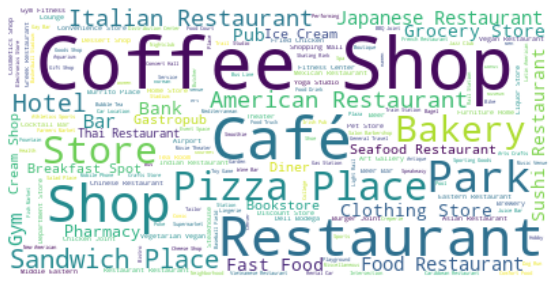

In [41]:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=2000).generate(text)

# Display the generated image:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Restaurants
Let's create a new dataframe with the venues category that contain the word "Restaurant", that is our target venue.

In [42]:
Restaurants = Toronto_venues[Toronto_venues['Venue Category'].str.contains("Restaurant")]
Restaurants.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
15,"North Toronto West, Lawrence Park",43.715383,-79.405678,C'est Bon,43.716785,-79.400406,Chinese Restaurant
19,"North Toronto West, Lawrence Park",43.715383,-79.405678,Sushi Shop,43.713861,-79.400093,Restaurant
21,"North Toronto West, Lawrence Park",43.715383,-79.405678,Tio's Urban Mexican,43.714630,-79.400000,Mexican Restaurant
22,"North Toronto West, Lawrence Park",43.715383,-79.405678,A&W,43.715149,-79.399944,Fast Food Restaurant
35,Davisville,43.704324,-79.388790,Marigold Indian Bistro,43.702881,-79.388008,Indian Restaurant


In [43]:
Restaurants.shape

(445, 7)

Create a map of Toronto's restaurants.

In [45]:
# create map of Toronto's restaurants using latitude and longitude values of venues
map_toronto_restaurants = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, venue, neighborhood in zip(Restaurants['Venue Latitude'], Restaurants['Venue Longitude'], Restaurants['Venue'], Restaurants['Neighborhood']):
    label = '{} - {}'.format(venue, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='cyan',
        fill=True,
        fill_color='#ff6200',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_restaurants)  
    
map_toronto_restaurants

### Exploratory Data Analysis

Let's get some detail about Neighborhoods and Restaurants

In [46]:
Restaurants_onehot = pd.get_dummies(Restaurants[['Venue Category']], prefix="", prefix_sep="")

Restaurants_onehot['Neighborhood'] = Restaurants['Neighborhood']

fixed_columns = [Restaurants_onehot.columns[-1]] + list(Restaurants_onehot.columns[:-1])
Restaurants_onehot = Restaurants_onehot[fixed_columns]
Restaurants_grouped = Restaurants_onehot.groupby('Neighborhood').mean().reset_index()
Restaurants_grouped



,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,...,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.333333,0.000000,0.333333,0.0,0.000000,0.0,0.000000,0.000000
2,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,...,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
3,"Bedford Park, Lawrence Manor East",0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.200000,0.000000,0.100000,0.0,0.100000,0.0,0.000000,0.000000
4,Berczy Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.166667,0.166667,0.083333,0.0,0.083333,0.0,0.083333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Victoria Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
61,Westmount,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,...,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
62,"Wexford, Maryvale",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
63,"Willowdale, Willowdale East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.25,0.166667,0.000000,0.166667,0.0,0.000000,0.0,0.000000,0.083333


In [48]:
# Here we can select a restaurant's category and find the neighborhood.
Restaurants_grouped1 = Restaurants_grouped[['Neighborhood', 'Thai Restaurant',]]
Restaurants_grouped1.head(10)

,Neighborhood,Thai Restaurant
0,Agincourt,0.000000
1,"Bathurst Manor, Wilson Heights, Downsview North",0.000000
2,Bayview Village,0.000000
3,"Bedford Park, Lawrence Manor East",0.100000
4,Berczy Park,0.083333
5,"Brockton, Parkdale Village, Exhibition Place",0.000000
6,"Business reply mail Processing Centre, South C...",0.000000
7,Canada Post Gateway Processing Centre,0.000000
8,Cedarbrae,0.333333
9,Central Bay Street,0.111111


In [49]:
Restaurants1_merged = pd.merge(Toronto_coord, Restaurants_grouped1, on='Neighborhood')
Restaurants1_merged.head(10)

,Borough,Postal Code,Neighborhood,Latitude,Longitude,Thai Restaurant
0,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,0.000000
1,Central Toronto,M4S,Davisville,43.704324,-79.388790,0.111111
2,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,0.000000
3,Central Toronto,M4V,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,0.000000
4,Central Toronto,M5P,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307,0.000000
5,Central Toronto,M5R,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,0.000000
6,Downtown Toronto,M4X,"St. James Town, Cabbagetown",43.667967,-79.367675,0.090909
7,Downtown Toronto,M4Y,Church and Wellesley,43.665860,-79.383160,0.000000
8,Downtown Toronto,M5A,"Regent Park, Harbourfront",43.654260,-79.360636,0.000000
9,Downtown Toronto,M5B,"Garden District, Ryerson",43.657162,-79.378937,0.052632


In [50]:
print (Restaurants['Venue Category'].value_counts())

Restaurant                         66
Japanese Restaurant                37
Italian Restaurant                 37
Sushi Restaurant                   27
American Restaurant                25
Fast Food Restaurant               24
Seafood Restaurant                 19
Thai Restaurant                    18
Vegetarian / Vegan Restaurant      17
Middle Eastern Restaurant          15
Chinese Restaurant                 14
Greek Restaurant                   14
Asian Restaurant                   12
Indian Restaurant                  12
Mexican Restaurant                 12
French Restaurant                  10
Vietnamese Restaurant              10
New American Restaurant             8
Caribbean Restaurant                8
Ramen Restaurant                    7
Comfort Food Restaurant             7
Mediterranean Restaurant            6
Latin American Restaurant           4
Modern European Restaurant          3
Korean Restaurant                   3
Gluten-free Restaurant              3
Moroccan Res

In [51]:
print("Description of restaurants category is")
print(Restaurants['Venue Category'].value_counts().describe())
print("The number of restaurants in this query is")
print(Restaurants['Venue Category'].shape)

Description of restaurants category is
count    47.000000
mean      9.468085
std      12.664313
min       1.000000
25%       1.000000
50%       3.000000
75%      13.000000
max      66.000000
Name: Venue Category, dtype: float64
The number of restaurants in this query is
(445,)


In [52]:
Toronto_restaurants = pd.merge(Toronto_coord, Restaurants, on='Neighborhood')
Toronto_restaurants

,Borough,Postal Code,Neighborhood,Latitude,Longitude,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,43.715383,-79.405678,C'est Bon,43.716785,-79.400406,Chinese Restaurant
1,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,43.715383,-79.405678,Sushi Shop,43.713861,-79.400093,Restaurant
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,43.715383,-79.405678,Tio's Urban Mexican,43.714630,-79.400000,Mexican Restaurant
3,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,43.715383,-79.405678,A&W,43.715149,-79.399944,Fast Food Restaurant
4,Central Toronto,M4S,Davisville,43.704324,-79.388790,43.704324,-79.388790,Marigold Indian Bistro,43.702881,-79.388008,Indian Restaurant
...,...,...,...,...,...,...,...,...,...,...,...
450,West Toronto,M6S,"Runnymede, Swansea",43.651571,-79.484450,43.651571,-79.484450,Goodfellas Wood Oven Pizza,43.648224,-79.486356,Italian Restaurant
451,West Toronto,M6S,"Runnymede, Swansea",43.651571,-79.484450,43.651571,-79.484450,Awai,43.650412,-79.478477,Vegetarian / Vegan Restaurant
452,West Toronto,M6S,"Runnymede, Swansea",43.651571,-79.484450,43.651571,-79.484450,Supper Solved,43.648781,-79.485233,Restaurant
453,West Toronto,M6S,"Runnymede, Swansea",43.651571,-79.484450,43.651571,-79.484450,Camp,43.655160,-79.486971,Restaurant


In a word cloud, restaurants venues look like this. 

In [53]:
text1 = " ".join(review for review in Toronto_restaurants['Venue Category'])
print ("There are {} words in the combination of all restaurant venues category.".format(len(text)))

There are 25768 words in the combination of all restaurant venues category.


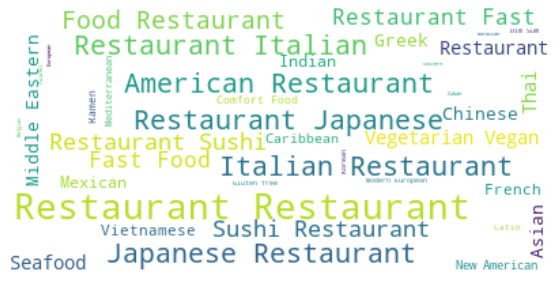

In [54]:
stopwords1 = set(STOPWORDS)
# Generate a word cloud image
wordcloud_restaurants = WordCloud(stopwords=stopwords1, background_color="white", max_words=2000).generate(text1)

# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud_restaurants, interpolation='bilinear')
plt.axis("off")
plt.show()

In the map, the restaurants categories and names look like this...

In [55]:
# create map of Toronto's categories restaurants using latitude and longitude values of venues
map_toronto_category = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, venue_category, venue in zip(Toronto_restaurants['Venue Latitude'], Toronto_restaurants['Venue Longitude'], Toronto_restaurants['Venue Category'], Toronto_restaurants['Venue']):
    label = '{} - {}'.format(venue, venue_category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='#0e15e8',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_category)  
    
map_toronto_category

### Explore restaurants categories

In [56]:
Restaurants.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
15,"North Toronto West, Lawrence Park",43.715383,-79.405678,C'est Bon,43.716785,-79.400406,Chinese Restaurant
19,"North Toronto West, Lawrence Park",43.715383,-79.405678,Sushi Shop,43.713861,-79.400093,Restaurant
21,"North Toronto West, Lawrence Park",43.715383,-79.405678,Tio's Urban Mexican,43.714630,-79.400000,Mexican Restaurant
22,"North Toronto West, Lawrence Park",43.715383,-79.405678,A&W,43.715149,-79.399944,Fast Food Restaurant
35,Davisville,43.704324,-79.388790,Marigold Indian Bistro,43.702881,-79.388008,Indian Restaurant


List of restaurants categories

In [57]:
List_restaurants=list(Restaurants['Venue Category'].value_counts().index)
List_restaurants

['Restaurant',
 'Japanese Restaurant',
 'Italian Restaurant',
 'Sushi Restaurant',
 'American Restaurant',
 'Fast Food Restaurant',
 'Seafood Restaurant',
 'Thai Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Middle Eastern Restaurant',
 'Chinese Restaurant',
 'Greek Restaurant',
 'Asian Restaurant',
 'Indian Restaurant',
 'Mexican Restaurant',
 'French Restaurant',
 'Vietnamese Restaurant',
 'New American Restaurant',
 'Caribbean Restaurant',
 'Ramen Restaurant',
 'Comfort Food Restaurant',
 'Mediterranean Restaurant',
 'Latin American Restaurant',
 'Modern European Restaurant',
 'Korean Restaurant',
 'Gluten-free Restaurant',
 'Moroccan Restaurant',
 'Belgian Restaurant',
 'Falafel Restaurant',
 'Eastern European Restaurant',
 'Dim Sum Restaurant',
 'Cuban Restaurant',
 'Molecular Gastronomy Restaurant',
 'Hakka Restaurant',
 'Afghan Restaurant',
 'German Restaurant',
 'Brazilian Restaurant',
 'Doner Restaurant',
 'Ethiopian Restaurant',
 'Taiwanese Restaurant',
 'Dumpling Restaura

Bar plot of boroughs and restaurants in Toronto

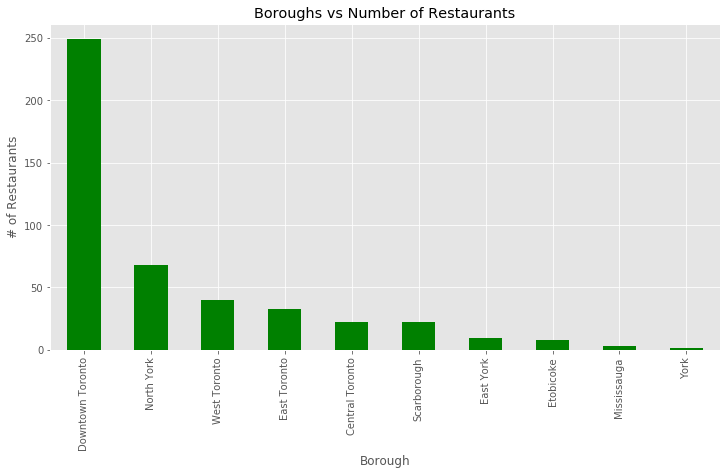

In [59]:
graph1 = pd.DataFrame(Toronto_restaurants.groupby('Borough')['Venue Category'].count())
graph1 = graph1.sort_values(by ='Venue Category', ascending=False)
graph1.iloc[:11].plot(kind='bar', figsize=(12,6), color='g')
plt.legend("", frameon=False)
plt.xlabel("Borough")
plt.ylabel("# of Restaurants")
plt.title("Boroughs vs Number of Restaurants")
plt.show()


Bar plot of restaurants categories in Toronto

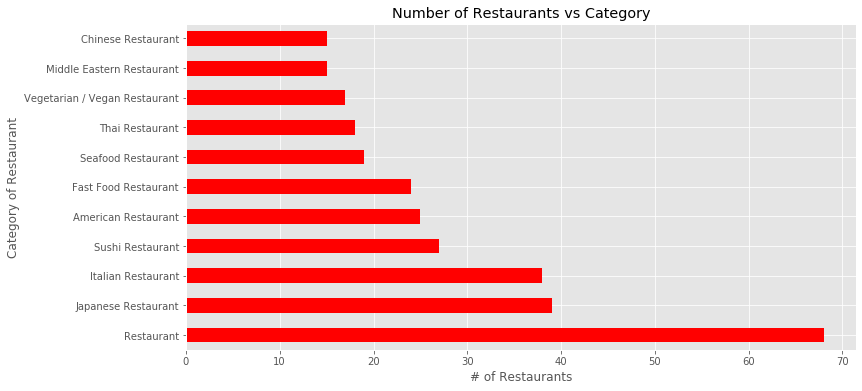

In [60]:
graph2 = pd.DataFrame(Toronto_restaurants.groupby('Venue Category')['Borough'].count())
graph2 = graph2.sort_values(by ='Borough', ascending=False)
graph2.iloc[:11].plot(kind='barh', figsize=(12,6), color='r')
plt.legend("", frameon=False)
plt.xlabel("# of Restaurants")
plt.ylabel("Category of Restaurant")
plt.title("Number of Restaurants vs Category")
plt.show()


In [61]:
graph2.head(10)

,Borough
Venue Category,
Restaurant,68
Japanese Restaurant,39
Italian Restaurant,38
Sushi Restaurant,27
American Restaurant,25
Fast Food Restaurant,24
Seafood Restaurant,19
Thai Restaurant,18
Vegetarian / Vegan Restaurant,17


### Restaurant count by borough

In [62]:
Restaurants2 = pd.get_dummies(Toronto_restaurants, columns=['Venue Category'], prefix="", prefix_sep="")
Restaurants2.head()

,Borough,Postal Code,Neighborhood,Latitude,Longitude,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,...,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,43.715383,-79.405678,C'est Bon,43.716785,-79.400406,...,0,0,0,0,0,0,0,0,0,0
1,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,43.715383,-79.405678,Sushi Shop,43.713861,-79.400093,...,0,0,1,0,0,0,0,0,0,0
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,43.715383,-79.405678,Tio's Urban Mexican,43.714630,-79.400000,...,0,0,0,0,0,0,0,0,0,0
3,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,43.715383,-79.405678,A&W,43.715149,-79.399944,...,0,0,0,0,0,0,0,0,0,0
4,Central Toronto,M4S,Davisville,43.704324,-79.388790,43.704324,-79.388790,Marigold Indian Bistro,43.702881,-79.388008,...,0,0,0,0,0,0,0,0,0,0


In [63]:
Restaurants2.shape

(455, 57)

In [64]:
Restaurants_grouped3 = Restaurants2.groupby('Borough').sum().reset_index()
Restaurants_grouped3.drop(['Latitude', 'Longitude','Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Latitude', 'Venue Longitude'], axis=1, inplace=True)
Restaurants_grouped3.set_index('Borough', inplace=True)
Restaurants_grouped3['Total'] = Restaurants_grouped3.sum(axis=1)
Restaurants_grouped3

,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,...,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Total
Borough,,,,,,,,,,,,,,,,,,,,,
Central Toronto,0,1,0,0,0,0,0,1,0,0,...,0,4,1,4,0,1,0,1,1,22
Downtown Toronto,1,16,5,2,1,0,3,4,1,5,...,4,38,17,15,1,11,1,13,3,249
East Toronto,0,3,1,0,0,0,1,0,0,1,...,0,4,1,1,0,1,0,0,0,33
East York,0,0,0,0,0,0,0,0,0,0,...,0,2,0,1,0,0,0,0,0,9
Etobicoke,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,8
Mississauga,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
North York,0,2,6,0,0,0,3,4,0,1,...,3,12,0,4,0,1,0,0,3,68
Scarborough,0,1,0,0,0,0,1,5,0,0,...,0,0,0,0,0,2,0,0,1,22
West Toronto,0,0,2,0,0,1,0,0,0,0,...,0,7,0,2,0,2,0,3,2,40


In [65]:
Restaurants_grouped3.shape

(10, 48)

In [66]:
Restaurants_grouped3.sort_values('Total',ascending=False).reset_index(drop=True)
Restaurants_grouped3

,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,...,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Total
Borough,,,,,,,,,,,,,,,,,,,,,
Central Toronto,0,1,0,0,0,0,0,1,0,0,...,0,4,1,4,0,1,0,1,1,22
Downtown Toronto,1,16,5,2,1,0,3,4,1,5,...,4,38,17,15,1,11,1,13,3,249
East Toronto,0,3,1,0,0,0,1,0,0,1,...,0,4,1,1,0,1,0,0,0,33
East York,0,0,0,0,0,0,0,0,0,0,...,0,2,0,1,0,0,0,0,0,9
Etobicoke,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,8
Mississauga,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
North York,0,2,6,0,0,0,3,4,0,1,...,3,12,0,4,0,1,0,0,3,68
Scarborough,0,1,0,0,0,0,1,5,0,0,...,0,0,0,0,0,2,0,0,1,22
West Toronto,0,0,2,0,0,1,0,0,0,0,...,0,7,0,2,0,2,0,3,2,40


In [67]:
Restaurants_grouped3_transposed = Restaurants_grouped3.T 
Restaurants_grouped3_transposed

Borough,Central Toronto,Downtown Toronto,East Toronto,East York,Etobicoke,Mississauga,North York,Scarborough,West Toronto,York
Afghan Restaurant,0,1,0,0,0,0,0,0,0,0
American Restaurant,1,16,3,0,1,1,2,1,0,0
Asian Restaurant,0,5,1,0,0,0,6,0,2,0
Belgian Restaurant,0,2,0,0,0,0,0,0,0,0
Brazilian Restaurant,0,1,0,0,0,0,0,0,0,0
Cajun / Creole Restaurant,0,0,0,0,0,0,0,0,1,0
Caribbean Restaurant,0,3,1,0,0,0,3,1,0,1
Chinese Restaurant,1,4,0,0,1,0,4,5,0,0
Colombian Restaurant,0,1,0,0,0,0,0,0,0,0
Comfort Food Restaurant,0,5,1,0,0,0,1,0,0,0


In [68]:
Restaurants_grouped3_transposed[['Downtown Toronto']].sort_values(by ='Downtown Toronto',  ascending=False)

Borough,Downtown Toronto
Total,249
Restaurant,38
Japanese Restaurant,28
Italian Restaurant,19
Seafood Restaurant,17
American Restaurant,16
Sushi Restaurant,15
Vegetarian / Vegan Restaurant,13
Thai Restaurant,11
French Restaurant,8


In [69]:
Restaurants_downtown=Toronto_restaurants.loc[Toronto_restaurants['Borough']=='Downtown Toronto']
Restaurants_downtown.drop(['Postal Code','Latitude','Longitude','Neighborhood Latitude','Neighborhood Longitude'], axis=1, inplace=True)
Restaurants_downtown

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Borough,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category
22,Downtown Toronto,"St. James Town, Cabbagetown",Kingyo Toronto,43.665895,-79.368415,Japanese Restaurant
23,Downtown Toronto,"St. James Town, Cabbagetown",F'Amelia,43.667536,-79.368613,Italian Restaurant
24,Downtown Toronto,"St. James Town, Cabbagetown",Murgatroid,43.667381,-79.369311,Restaurant
25,Downtown Toronto,"St. James Town, Cabbagetown",Butter Chicken Factory,43.667072,-79.369184,Indian Restaurant
26,Downtown Toronto,"St. James Town, Cabbagetown",Mr. Jerk,43.667328,-79.373389,Caribbean Restaurant
...,...,...,...,...,...,...
266,Downtown Toronto,Christie,Actinolite,43.667858,-79.428054,Restaurant
267,Downtown Toronto,"Queen's Park, Ontario Provincial Government",Mercatto,43.660391,-79.387664,Italian Restaurant
268,Downtown Toronto,"Queen's Park, Ontario Provincial Government",Sushi Box,43.662960,-79.386580,Sushi Restaurant
269,Downtown Toronto,"Queen's Park, Ontario Provincial Government",Tokyo Sushi,43.665885,-79.386977,Sushi Restaurant


### Restaurants map in Toronto's Downtown

In [70]:
# create map of Toronto's downtown restaurants using latitude and longitude values of venues
map_toronto_downtown = folium.Map(location=[latitude, longitude], zoom_start=14)

# add markers to map
for lat, lng, venue_category, venue in zip(Restaurants_downtown['Venue Latitude'], Restaurants_downtown['Venue Longitude'], Restaurants_downtown['Venue Category'], Restaurants_downtown['Venue']):
    label = '{} - {}'.format(venue, venue_category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#16e30b',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_downtown)  
    
map_toronto_downtown

I hope this project will help you to find the restaurant yor might be interested in Toronto...
#### Thank you!